https://www.kaggle.com/datasets/noamsegal/affectnet-training-data/data
## About Dataset
About Dataset
Processed for a Neural Network
AffectNet is a large database of faces labeled by "affects" (psychological term for facial expressions). In order to accommodate common memory constraints, the resolution was reduced down to 96x96. Meaning that all images are exactly 96x96 pixels.

In [2]:
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('noamsegal/affectnet-training-data', path='../data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/noamsegal/affectnet-training-data


In [3]:
from torchvision.datasets import ImageFolder

data = ImageFolder('../data')

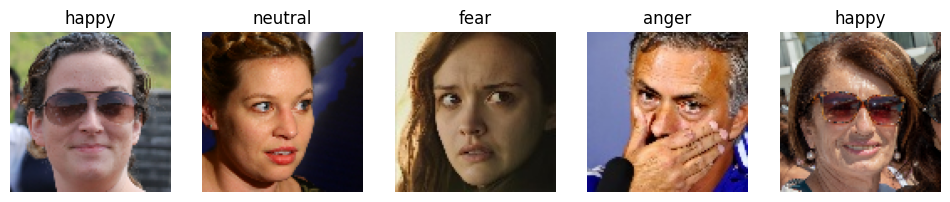

In [4]:
# plot some images
def plot_images(images, labels):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 3))
    for ax, img, label in zip(axes, images, labels):
        ax.imshow(img)
        ax.set_title(data.classes[label])
        ax.axis('off')
    plt.show()
    
# randomly sample 5 images
import random
import matplotlib.pyplot as plt
images, labels = zip(*[data[i] for i in random.sample(range(len(data)), 5)])
plot_images(images, labels)

<Axes: xlabel='label'>

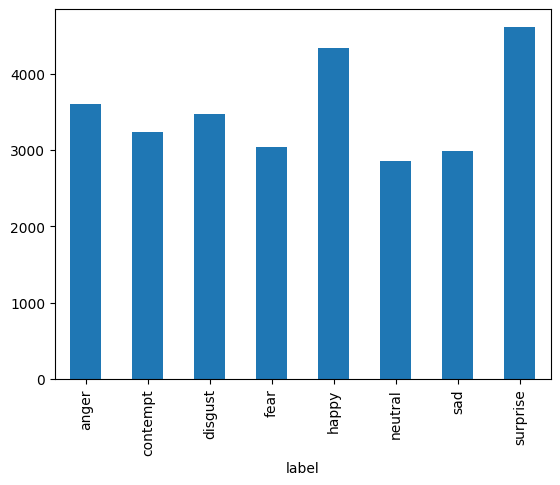

In [12]:
import pandas as pd
df = pd.read_csv('../data/labels.csv', index_col=0)
df.label.value_counts().sort_index().plot(kind='bar')

In [15]:
df.label.unique().tolist()

['surprise', 'anger', 'disgust', 'fear', 'sad', 'contempt', 'neutral', 'happy']

In [22]:
# class weights
class_weights = 1 / df.label.value_counts().sort_index().values
class_weights

array([0.00027716, 0.00030826, 0.00028802, 0.00032862, 0.00023063,
       0.00034953, 0.00033389, 0.00021664])

In [10]:
root_dir = '../data'
from lightning_datamodule import EmotionDataModule
dm = EmotionDataModule(root_dir, df)

In [11]:
dm.setup(stage='fit')